<div style="
    color: red; 
    border: 2px solid black; 
    border-radius: 15px; 
    padding: 8px; 
    font-size: 24px; 
    font-weight: bold; 
    text-align: center; 
    margin: 20px 0;">
    <div style="
        border: 2px solid red; 
        border-radius: 10px; 
        padding: 10px;">
        <img src="https://kajabi-storefronts-production.kajabi-cdn.com/kajabi-storefronts-production/file-uploads/themes/2155698250/settings_images/dd1ab6f-208-d4e5-d187-483a245d87_logo_header_Datailab.png" alt="Datailab Logo" style="max-width: 100%; height: auto;">
        <h2 style="color: black; margin-top: 10px;">SQL , Jupyternotebook, SQLlite </h2>
    </div>
</div>

<div style="
    color: red; 
    border: 2px solid black; 
    border-radius: 15px; 
    padding: 8px; 
    font-size: 18px; 
    font-weight: bold; 
    text-align: center; 
    margin: 20px 0;">
    <div style="
        border: 2px solid red; 
        border-radius: 10px; 
        padding: 10px;">
       Prérequis
    </div>
</div>
Exécuter cette ceulle


In [23]:
%pip install -q ipython-sql mysql-connector-python ipywidgets pandas matplotlib

<div style="
    color: red; 
    border: 2px solid black; 
    border-radius: 15px; 
    padding: 8px; 
    font-size: 18px; 
    font-weight: bold; 
    text-align: center; 
    margin: 20px 0;">
    <div style="
        border: 2px solid red; 
        border-radius: 10px; 
        padding: 10px;">
       Charger SQL
    </div>
</div>

In [2]:
%load_ext sql

<div style="
    color: red; 
    border: 2px solid black; 
    border-radius: 15px; 
    padding: 8px; 
    font-size: 18px; 
    font-weight: bold; 
    text-align: center; 
    margin: 20px 0;">
    <div style="
        border: 2px solid red; 
        border-radius: 10px; 
        padding: 10px;">
       Connexion à une base de données
    </div>
</div>

In [3]:
%sql sqlite:///data/company_operations.db


<div style="
    color: red; 
    border: 2px solid black; 
    border-radius: 15px; 
    padding: 8px; 
    font-size: 18px; 
    font-weight: bold; 
    text-align: center; 
    margin: 20px 0;">
    <div style="
        border: 2px solid red; 
        border-radius: 10px; 
        padding: 10px;">
       Séléctionner les 5 premières lignes de la table Customer
    </div>
</div>

In [4]:
%%sql
SELECT * FROM CUSTOMER
LIMIT 5



 * sqlite:///data/company_operations.db
Done.


CUSTOMER_ID,CUSTOMER_NAME,ADDRESS,CITY,STATE,ZIP,CATEGORY
1,Alpha Medical,18745 Train Dr,Dallas,TX,75021,INDUSTRIAL
2,Oak Cliff Base,2379 Cliff Ave,Abbevile,LA,70510,GOVERNMENT
3,Sports Unlimited,1605 Station Dr,Alexandrai,LA,71301,COMMERCIAL
4,Riley Sporting Goods,9854 Firefly Blvd,Austin,TX,78701,COMMERCIAL
5,Lite Industrial,462 Roadrunner Blvd,Houston,TX,77254,INDUSTRIAL


<div style="
    color: red; 
    border: 2px solid black; 
    border-radius: 15px; 
    padding: 8px; 
    font-size: 18px; 
    font-weight: bold; 
    text-align: center; 
    margin: 20px 0;">
    <div style="
        border: 2px solid red; 
        border-radius: 10px; 
        padding: 10px;">
       Afficher le SCHEMA de la base de  donnée 
    </div>
</div>

In [5]:
%%sql

SELECT * FROM sqlite_master WHERE type='table'

 * sqlite:///data/company_operations.db
Done.


type,name,tbl_name,rootpage,sql
table,CALENDAR,CALENDAR,2,CREATE TABLE CALENDAR (CALENDAR_DATE DATE PRIMARY KEY)
table,CUSTOMER,CUSTOMER,4,"CREATE TABLE CUSTOMER (CUSTOMER_ID INTEGER PRIMARY KEY, CUSTOMER_NAME VARCHAR (30) NOT NULL, ADDRESS VARCHAR (50) NOT NULL, CITY VARCHAR (20) NOT NULL, STATE CHAR (2) NOT NULL, ZIP INTEGER, CATEGORY VARCHAR NOT NULL CHECK (CATEGORY IN ('GOVERNMENT', 'COMMERCIAL', 'INDUSTRIAL')))"
table,EMPLOYEE,EMPLOYEE,5,"CREATE TABLE EMPLOYEE (ID INTEGER PRIMARY KEY, FIRST_NAME VARCHAR NOT NULL, LAST_NAME VARCHAR NOT NULL, TITLE VARCHAR NOT NULL, DEPARTMENT VARCHAR NOT NULL, HIRE_DATE DATE, DEPARTURE_DATE DATE, MANAGER_ID INTEGER)"
table,PRODUCT,PRODUCT,6,"CREATE TABLE PRODUCT (PRODUCT_ID INTEGER PRIMARY KEY NOT NULL, PRODUCT_NAME VARCHAR (30) NOT NULL, PRODUCT_GROUP VARCHAR, PRICE DECIMAL NOT NULL)"
table,CUSTOMER_ORDER,CUSTOMER_ORDER,7,"CREATE TABLE CUSTOMER_ORDER (CUSTOMER_ORDER_ID INTEGER PRIMARY KEY, CUSTOMER_ID INTEGER NOT NULL REFERENCES CUSTOMER (CUSTOMER_ID), ORDER_DATE DATE NOT NULL, PRODUCT_ID INTEGER NOT NULL, QUANTITY INTEGER NOT NULL, RUSH_SHIP BOOLEAN DEFAULT (0))"
table,EMPLOYEE_AIR_TRAVEL,EMPLOYEE_AIR_TRAVEL,10,"CREATE TABLE EMPLOYEE_AIR_TRAVEL (BOOKING_ID INTEGER PRIMARY KEY, BOOKED_EMPLOYEE_ID INTEGER NOT NULL REFERENCES EMPLOYEE (ID), DEPARTURE_DATE DATE NOT NULL, ORIGIN CHAR (3) NOT NULL, DESTINATION CHAR (3) NOT NULL, FARE_PRICE DOUBLE NOT NULL DEFAULT (0), NUM_OF_PASSENGERS INTEGER NOT NULL DEFAULT (1), RETURN_BOOKING_ID INTEGER)"
table,WEATHER_MONITOR,WEATHER_MONITOR,11,"CREATE TABLE WEATHER_MONITOR (ID INTEGER, REPORT_CODE TEXT, REPORT_DATE TIMESTAMP, LOCATION_ID INTEGER, TEMPERATURE REAL, OVERCAST INTEGER, RAIN REAL, SNOW REAL, LIGHTNING INTEGER, HAIL INTEGER, TORNADO INTEGER)"


<div style="
    color: red; 
    border: 2px solid black; 
    border-radius: 15px; 
    padding: 8px; 
    font-size: 18px; 
    font-weight: bold; 
    text-align: center; 
    margin: 20px 0;">
    <div style="
        border: 2px solid red; 
        border-radius: 10px; 
        padding: 10px;">
       Transformer une requète en dataframe
    </div>
</div>

In [6]:
result = %sql SELECT * FROM CUSTOMER LIMIT 5

 * sqlite:///data/company_operations.db
Done.


In [8]:
import pandas 

In [9]:
dataframe = result.DataFrame()

In [17]:
dataframe

,CUSTOMER_ID,CUSTOMER_NAME,ADDRESS,CITY,STATE,ZIP,CATEGORY
0,1,Alpha Medical,18745 Train Dr,Dallas,TX,75021,INDUSTRIAL
1,2,Oak Cliff Base,2379 Cliff Ave,Abbevile,LA,70510,GOVERNMENT
2,3,Sports Unlimited,1605 Station Dr,Alexandrai,LA,71301,COMMERCIAL
3,4,Riley Sporting Goods,9854 Firefly Blvd,Austin,TX,78701,COMMERCIAL
4,5,Lite Industrial,462 Roadrunner Blvd,Houston,TX,77254,INDUSTRIAL


<div style="
    color: red; 
    border: 2px solid black; 
    border-radius: 15px; 
    padding: 8px; 
    font-size: 18px; 
    font-weight: bold; 
    text-align: center; 
    margin: 20px 0;">
    <div style="
        border: 2px solid red; 
        border-radius: 10px; 
        padding: 10px;">
       Ajouter une colonne pour la réduction des prix
    </div>
</div>

In [18]:
%%sql
SELECT PRODUCT_NAME,
      PRICE,
      PRICE*0.9 AS REDUCED_PRICE
FROM  PRODUCT

 * sqlite:///data/company_operations.db
Done.


PRODUCT_NAME,PRICE,REDUCED_PRICE
Eagle Kit,120,108.0
Hawkeye Cam,80,72.0
Sparrow Blade,40,36.0
Raven Klaw,40,36.0
Kriket Light,25,22.5
Owl NV,100,90.0
Vulture X,56,50.4
Roadrunner Pro,70,63.0
Falcon Tracker,20,18.0
Emu Handheld,35,31.5


<div style="
    color: red; 
    border: 2px solid black; 
    border-radius: 15px; 
    padding: 8px; 
    font-size: 18px; 
    font-weight: bold; 
    text-align: center; 
    margin: 20px 0;">
    <div style="
        border: 2px solid red; 
        border-radius: 10px; 
        padding: 10px;">
       Histogramme et Picharts
    </div>
</div>
 Afficher tous les produits de la table Products

In [37]:
%%sql 
SELECT * From PRODUCT

 * sqlite:///data/company_operations.db
Done.


PRODUCT_ID,PRODUCT_NAME,PRODUCT_GROUP,PRICE
1,Eagle Kit,ALPHA,120
2,Hawkeye Cam,ALPHA,80
3,Sparrow Blade,BETA,40
4,Raven Klaw,BETA,40
5,Kriket Light,GAMMA,25
6,Owl NV,ALPHA,100
7,Vulture X,BETA,56
8,Roadrunner Pro,ALPHA,70
9,Falcon Tracker,GAMMA,20
10,Emu Handheld,GAMMA,35


<div style="
    color: red; 
    border: 2px solid black; 
    border-radius: 15px; 
    padding: 8px; 
    font-size: 18px; 
    font-weight: bold; 
    text-align: center; 
    margin: 20px 0;">
    <div style="
        border: 2px solid red; 
        border-radius: 10px; 
        padding: 10px;">
       compter les nombres de produits par PRODUCT_GROUP
    </div>
</div>


In [38]:
%%sql 
SELECT PRODUCT_GROUP, COUNT(*) as Total 
FROM  PRODUCT
Group By PRODUCT_GROUP

 * sqlite:///data/company_operations.db
Done.


PRODUCT_GROUP,Total
None,2
ALPHA,5
BETA,5
GAMMA,3


%sql \
SELECT PRODUCT_GROUP, COUNT(*) as Total \
FROM  PRODUCT\
Group By PRODUCT_GROUP

In [34]:
result = %sql \
SELECT PRODUCT_GROUP, COUNT(*) as Total \
FROM  PRODUCT\
Group By PRODUCT_GROUP

 * sqlite:///data/company_operations.db
Done.


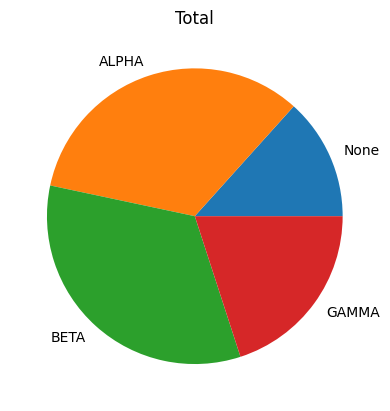

In [35]:
result.pie();

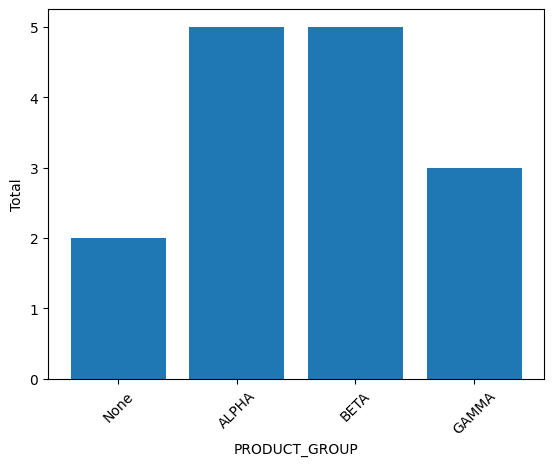

In [36]:
result.bar();